<a href="https://colab.research.google.com/github/wstroks/DeepWstroks/blob/master/Machine%20Learning%20para%20Competi%C3%A7%C3%B5es%20Kaggle/Desafio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Informação da Competição e Curso

A Administração de Relacionamento com o Consumidor é um elemento-chave das estratégias modernas de marketing. A maneira mais prática de adquirir conhecimento sobre consumidores é produzindo pontuações. Uma pontuação é a saída de um modelo e serve como avaliação de todas as instâncias de uma variável-alvo que se pretenda explicar. Ferramentas que produzem pontuações permitem projetar informações quantificáveis em uma dada população. A pontuação é calculada usando variáveis de entrada que descrevem as instâncias. As pontuações são então usadas pelo sistema de informação, por exemplo, para personalizar o relacionamento com o consumidor.

Em 2009, a conferência Knowledge Discovery and Data Mining (KDD) lançou um desafio envolvendo aprendizagem de máquina. Ela disponibilizou dados de consumidores da empresa de telecomunicações francesa Orange, que deveriam ser utilizados para a construção de um modelo capaz de prever três comportamentos do consumidor. A planilha fornecida tem 50000 instâncias e 230 variáveis, sendo as primeiras 190 variáveis numéricas e as demais 40 categóricas. As variáveis de saída do modelo eram o cancelamento da conta ('churn'), a tendência de usar novos produtos e serviços ('appetency') e a propensão para comprar upgrades ou adicionais com maior margem de lucro quando apresentados (upselling), fornecidos de forma binária (-1 para *não*, 1 para *sim*).

O trabalho apresentado aqui envolve a criação de um modelo para predição de *churn*, *appetency* e *upselling* com base nos dados fornecidos dos clientes da Orange. O critério para avaliação do modelo será a métrica AUC, que dimensiona o trade-off entre taxa de falsos positivos e taxa de verdadeiros positivos: quanto mais próximo de 1, menor o trade-off e melhor o modelo.

Detalhes sobre a competição: https://www.kdd.org/kdd-cup/view/kdd-cup-2009

## O que é UAC?! (Area Under The Curve)



As curvas AUC e ROC estão entre as métricas mais utilizadas para a avaliação de um modelo de Machine Learning.
A curva AUC é derivada da curva ROC, então vamos inicialmente entender a curva ROC, que significa “Receiver Operating Characteristic”.


A curva ROC mostra o quão bom o modelo criado pode distinguir entre duas coisas (já que é utilizado para classificação). Essas duas coisas podem ser 0 ou 1, ou positivo e negativo. Os melhores modelos conseguem distinguir com precisão o binômio.

### O ROC possui dois parâmetros:

1.   Taxa de verdadeiro positivo (True Positive Rate), que é dado por true positives / (true positives + false negatives)
2.   Taxa de falso positivo (False Positive Rate), que é dado por false positives / (false positives + true negatives)

Uma curva ROC traça “True Positive Rate vs. False Positive Rate” em diferentes limiares de classificação (veja figura abaixo).

Assim, na tentativa de simplificar a análise da ROC, a AUC (“area under the ROC curve”) nada mais é que uma maneira de resumir a curva ROC em um único valor, agregando todos os limiares da ROC, calculando a “área sob a curva”.

### AUC

O valor do AUC varia de 0,0 até 1,0 e o limiar entre a classe é 0,5. Ou seja, acima desse limite, o algoritmo classifica em uma classe e abaixo na outra classe.
Quanto maior o AUC, melhor.

![alt text](https://miro.medium.com/max/1400/1*RqK5DjVxcj4qZsCdN4FOSQ.png)

Um modelo cujas previsões estão 100% erradas tem uma AUC de 0, enquanto um modelo cujas previsões são 100% corretas tem uma AUC de 1. Cada modelo apresentará um valor de AUC, o que irá te auxiliar na escolha do melhor, como na figura abaixo:

O interessante do AUC é que a métrica é invariante em escala, uma vez que trabalha com precisão das classificações ao invés de seus valores absolutos. Além disso, também mede a qualidade das previsões do modelo, independentemente do limiar de classificação.


### Fontes  [link 1](https://medium.com/bio-data-blog/entenda-o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-8191fb4df772) [link 2](https://medium.com/@eam.avelar/o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-2e2c4112033d)




## Etapa 1: Modelo de cancelamento de conta ('churn')

In [0]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

#### Arquivos que são utilizados para rodar o desafio importados do my drive (train, test, etc)

[link text](https://drive.google.com/drive/folders/11jBTS4Gknv9ZBmAEB-CxYTIK9k7jbNtT?usp=sharing)

---



In [152]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Carregando dados

upload atraves do files

In [0]:
recursos = pd.read_csv('/content/drive/My Drive/Desafio/orange_small_train.data', sep='\t', na_filter=False)
resultado = pd.read_csv('/content/drive/My Drive/Desafio/orange_small_train_churn.labels', header=None)


#### 50 mil dados e 230 colunas

In [154]:
recursos.shape


(50000, 230)

In [155]:
recursos.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12,Var13,Var14,Var15,Var16,Var17,Var18,Var19,Var20,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30,Var31,Var32,Var33,Var34,Var35,Var36,Var37,Var38,Var39,Var40,...,Var191,Var192,Var193,Var194,Var195,Var196,Var197,Var198,Var199,Var200,Var201,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var209,Var210,Var211,Var212,Var213,Var214,Var215,Var216,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,,,,,,1526,7,,,,,,184,,,,,,,,464,580,,14,128,,,166.56,,,,,,,0,,,3570,,,...,,bZkvyxLkBI,RO12,,taul,1K8T,lK27,ka_ns41,nQUveAzAF7,,,dXGu,9_Y1,FbIm,VpdQ,haYg,me75fM6ugJ,kIsH,,uKAI,L84s,XfqtO3UdzaXh_,,,,XTbPUYD,sH5Z,cJvF,FzaX,1YVfGrO,oslk,fXVEsaq,jySVZNlOJy,,,xb3V,RAYp,F2FyR07IdsN7I,,
1,,,,,,525,0,,,,,,0,,,,,,,,168,210,,2,24,,,353.52,,,,,,,0,,,4764966,,,...,,CEat0G8rTN,RO12,,taul,1K8T,2Ix5,qEdASpP,y2LIM01bE1,,,lg1t,9_Y1,k13i,sJzTlal,zm5i,me75fM6ugJ,kIsH,,uKAI,L84s,NhsEn4L,,,,kZJyVg2,,,FzaX,0AJo2f2,oslk,2Kb5FSF,LM8l689qOp,,,fKCe,RAYp,F2FyR07IdsN7I,,
2,,,,,,5236,7,,,,,,904,,,,,,,,1212,1515,,26,816,,,220.08,,,,,,,0,,,5883894,,,...,,eOQt0GoOh3,AERks4l,SEuy,taul,1K8T,ffXs,NldASpP,y4g9XoZ,vynJTq9,smXZ,4bTR,9_Y1,MGOA,VpdQ,haYg,DHn_WUyBhW_whjA88g9bvA64_,kIsH,,uKAI,L84s,UbxQ8lZ,,TTGHfSv,,pMWAe2U,bHR7,UYBR,FzaX,JFM1BiF,Al6ZaUT,NKv4yOc,jySVZNlOJy,,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,
3,,,,,,,0,,,,,,0,,,,,,,,,0,,,0,,,22.08,,,,,,,0,,,0,,,...,,jg69tYsGvO,RO12,,taul,1K8T,ssAy,_ybO0dd,4hMlgkf58mhwh,,,W8mQ,9_Y1,YULl,VpdQ,,me75fM6ugJ,kIsH,,uKAI,Mtgm,NhsEn4L,,,,kq0dQfu,eKej,UYBR,FzaX,L91KIiz,oslk,CE7uk3u,LM8l689qOp,,,FSa2,RAYp,F2FyR07IdsN7I,,
4,,,,,,1029,7,,,,,,3216,,,,,,,,64,80,,4,64,,,200,,,,,,,0,,,0,,,...,,IXSgUHShse,RO12,SEuy,taul,1K8T,uNkU,EKR938I,ThrHXVS,0v21jmy,smXZ,xklU,9_Y1,RVjC,sJzTlal,6JmL,me75fM6ugJ,kIsH,,uKAI,L84s,XfqtO3UdzaXh_,,SJs3duv,,11p4mKe,H3p7,UYBR,FzaX,OrnLfvc,oslk,1J2cvxe,LM8l689qOp,,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,


In [156]:
resultado.head()

,0
0,-1
1,1
2,-1
3,-1
4,-1


In [157]:
np.unique(resultado)

array([-1,  1])

 ### Identificar as variaveis numericas e categóricas (As primeiras 190 variáveis numéricas e as demais 40 categóricas)

In [0]:
todas_as_variaveis = np.array(recursos.columns)

In [159]:
todas_as_variaveis

array(['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8',
       'Var9', 'Var10', 'Var11', 'Var12', 'Var13', 'Var14', 'Var15',
       'Var16', 'Var17', 'Var18', 'Var19', 'Var20', 'Var21', 'Var22',
       'Var23', 'Var24', 'Var25', 'Var26', 'Var27', 'Var28', 'Var29',
       'Var30', 'Var31', 'Var32', 'Var33', 'Var34', 'Var35', 'Var36',
       'Var37', 'Var38', 'Var39', 'Var40', 'Var41', 'Var42', 'Var43',
       'Var44', 'Var45', 'Var46', 'Var47', 'Var48', 'Var49', 'Var50',
       'Var51', 'Var52', 'Var53', 'Var54', 'Var55', 'Var56', 'Var57',
       'Var58', 'Var59', 'Var60', 'Var61', 'Var62', 'Var63', 'Var64',
       'Var65', 'Var66', 'Var67', 'Var68', 'Var69', 'Var70', 'Var71',
       'Var72', 'Var73', 'Var74', 'Var75', 'Var76', 'Var77', 'Var78',
       'Var79', 'Var80', 'Var81', 'Var82', 'Var83', 'Var84', 'Var85',
       'Var86', 'Var87', 'Var88', 'Var89', 'Var90', 'Var91', 'Var92',
       'Var93', 'Var94', 'Var95', 'Var96', 'Var97', 'Var98', 'Var99',
       'Var100', 'Va

In [160]:
numericas_variaveis = np.array(todas_as_variaveis[:190])
numericas_variaveis

array(['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8',
       'Var9', 'Var10', 'Var11', 'Var12', 'Var13', 'Var14', 'Var15',
       'Var16', 'Var17', 'Var18', 'Var19', 'Var20', 'Var21', 'Var22',
       'Var23', 'Var24', 'Var25', 'Var26', 'Var27', 'Var28', 'Var29',
       'Var30', 'Var31', 'Var32', 'Var33', 'Var34', 'Var35', 'Var36',
       'Var37', 'Var38', 'Var39', 'Var40', 'Var41', 'Var42', 'Var43',
       'Var44', 'Var45', 'Var46', 'Var47', 'Var48', 'Var49', 'Var50',
       'Var51', 'Var52', 'Var53', 'Var54', 'Var55', 'Var56', 'Var57',
       'Var58', 'Var59', 'Var60', 'Var61', 'Var62', 'Var63', 'Var64',
       'Var65', 'Var66', 'Var67', 'Var68', 'Var69', 'Var70', 'Var71',
       'Var72', 'Var73', 'Var74', 'Var75', 'Var76', 'Var77', 'Var78',
       'Var79', 'Var80', 'Var81', 'Var82', 'Var83', 'Var84', 'Var85',
       'Var86', 'Var87', 'Var88', 'Var89', 'Var90', 'Var91', 'Var92',
       'Var93', 'Var94', 'Var95', 'Var96', 'Var97', 'Var98', 'Var99',
       'Var100', 'Va

In [161]:
categoricas_variaveis = np.array(todas_as_variaveis[190:])
categoricas_variaveis

array(['Var191', 'Var192', 'Var193', 'Var194', 'Var195', 'Var196',
       'Var197', 'Var198', 'Var199', 'Var200', 'Var201', 'Var202',
       'Var203', 'Var204', 'Var205', 'Var206', 'Var207', 'Var208',
       'Var209', 'Var210', 'Var211', 'Var212', 'Var213', 'Var214',
       'Var215', 'Var216', 'Var217', 'Var218', 'Var219', 'Var220',
       'Var221', 'Var222', 'Var223', 'Var224', 'Var225', 'Var226',
       'Var227', 'Var228', 'Var229', 'Var230'], dtype=object)

In [162]:
var = recursos.groupby('Var1').size()
var

Var1
       49298
0        380
120        1
128        2
152        1
16        81
24        46
32        23
360        1
392        1
40        10
48         6
536        1
56         5
64         1
680        1
72         3
8        138
80         1
dtype: int64

In [0]:
contador_de_colunas = pd.DataFrame()
for colunas in numericas_variaveis:
  coluna_contador= recursos.groupby(colunas).size()
  contador_de_colunas= contador_de_colunas.append(coluna_contador, ignore_index= True)

In [164]:
contador_de_colunas.shape

(190, 351788)

In [165]:
contador_de_colunas.head()

,,0,120,128,152,16,24,32,360,392,40,48,536,56,64,680,72,8,80,5,102,105,10617,108,1083,111,1113,114,1155,117,12,123,1242,126,12633,129,12927,130668,1332,1344,...,6651.18,67723.29,6893.82,69126.48,69166.71,693.45,693.99,7.47,7030.17,70445.25,7135.65,72177.84,73467.99,7584.66,7597.979,76999.23,77.67,78230.79,7922.7,79562.08,8022.96,81838.62,82165.95,8328.149,843.57,8573.939,8615.25,8660.25,86645.08,87838.47,8900.46,920.88,9336.06,9379.709,9441.36,9607.05,966.15,9772.021,98.1,9857.88
0,49298.0,380.0,1.0,2.0,1.0,81.0,46.0,23.0,1.0,1.0,10.0,6.0,1.0,5.0,1.0,1.0,3.0,138.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,48759.0,1240.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,48760.0,996.0,3.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,3.0,2.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,48421.0,1561.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,48513.0,898.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### visualizar a Matriz transposta

In [166]:
contador_de_colunas.T.shape

(351788, 190)

In [167]:
contador_de_colunas.T.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189
,49298.0,48759.0,48760.0,48421.0,48513.0,5529.0,5539.0,50000.0,49298.0,48513.0,48760.0,49442.0,5539.0,48760.0,50000.0,48513.0,48421.0,48421.0,48421.0,50000.0,5529.0,5009.0,48513.0,7230.0,5009.0,48513.0,48513.0,5011.0,49298.0,49298.0,50000.0,50000.0,49153.0,48759.0,5009.0,48759.0,48421.0,5009.0,50000.0,48759.0,...,49153.0,48421.0,5009.0,49298.0,48421.0,49306.0,48871.0,49127.0,48759.0,5009.0,48421.0,48759.0,5009.0,48421.0,49127.0,48513.0,50000.0,49298.0,50000.0,48759.0,48917.0,48513.0,5009.0,48421.0,50000.0,48760.0,48759.0,49354.0,48421.0,49298.0,5009.0,48421.0,48759.0,48759.0,50000.0,49298.0,49298.0,48759.0,28978.0,49667.0
0,380.0,1240.0,996.0,1561.0,898.0,976.0,13090.0,NaN,144.0,902.0,NaN,304.0,12258.0,1154.0,NaN,54.0,939.0,1200.0,1543.0,NaN,1815.0,2221.0,1052.0,16205.0,6629.0,1457.0,1467.0,388.0,694.0,195.0,NaN,NaN,523.0,1126.0,41219.0,692.0,964.0,9405.0,NaN,830.0,...,523.0,475.0,2221.0,273.0,1430.0,142.0,418.0,650.0,939.0,3848.0,1266.0,747.0,13457.0,1296.0,650.0,898.0,NaN,4.0,NaN,892.0,290.0,391.0,44857.0,964.0,NaN,1083.0,771.0,174.0,1289.0,144.0,41990.0,706.0,830.0,771.0,NaN,525.0,240.0,44.0,NaN,4.0
120,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,134.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,959.0,296.0,1.0,NaN,762.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,2.0,...,2.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,56.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.0,NaN
128,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1680.0,NaN,NaN,NaN,703.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,124.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,968.0,NaN,NaN,1.0,664.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
contador_de_colunas= contador_de_colunas.T
contador_de_colunas.index = contador_de_colunas.index.astype('str')
contador_de_colunas.sort_index(inplace= True)
print("Primeiras dez categorias" , contador_de_colunas.index[:10])
print("ultimas dez categorias" , contador_de_colunas.index[(len(contador_de_colunas.index)-10):])

Primeiras dez categorias Index(['', '-10', '-1000060.0', '-10002.16', '-100034.8', '-1000420.0',
       '-1000468.0', '-1000496.0', '-1000516.0', '-1000548.0'],
      dtype='object')
ultimas dez categorias Index(['9999040', '999920', '9999240', '99993', '9999400', '9999440',
       '9999480', '99995', '99996', '999971'],
      dtype='object')


In [0]:
contador_de_colunas = pd.DataFrame()
for colunas in categoricas_variaveis:
  coluna_contador= recursos.groupby(colunas).size()
  contador_de_colunas= contador_de_colunas.append(coluna_contador, ignore_index= True)

In [170]:
contador_de_colunas= contador_de_colunas.T
contador_de_colunas.index = contador_de_colunas.index.astype('str')
contador_de_colunas.sort_index(inplace= True)
print("Primeiras dez categorias" , contador_de_colunas.index[:10])
print("ultimas dez categorias" , contador_de_colunas.index[(len(contador_de_colunas.index)-10):])

Primeiras dez categorias Index(['', '000J', '0062', '00AD', '00ARusu', '00AYONy', '00AhP4J', '00J8E9a',
       '00JHTSP', '00L3'],
      dtype='object')
ultimas dez categorias Index(['zzQ9udm', 'zzQV', 'zzbGOGx', 'zzbGa54', 'zzcv6yg4s3UGv', 'zzfHvGh',
       'zzfLM_S', 'zzfUfAI', 'zzfo6HG', 'zzpZ'],
      dtype='object')


In [0]:
recursos = recursos.replace('',np.nan)

In [172]:
recursos.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12,Var13,Var14,Var15,Var16,Var17,Var18,Var19,Var20,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30,Var31,Var32,Var33,Var34,Var35,Var36,Var37,Var38,Var39,Var40,...,Var191,Var192,Var193,Var194,Var195,Var196,Var197,Var198,Var199,Var200,Var201,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var209,Var210,Var211,Var212,Var213,Var214,Var215,Var216,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,1526,7,NaN,NaN,NaN,NaN,NaN,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,464,580,NaN,14,128,NaN,NaN,166.56,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,3570,NaN,NaN,...,NaN,bZkvyxLkBI,RO12,NaN,taul,1K8T,lK27,ka_ns41,nQUveAzAF7,NaN,NaN,dXGu,9_Y1,FbIm,VpdQ,haYg,me75fM6ugJ,kIsH,NaN,uKAI,L84s,XfqtO3UdzaXh_,NaN,NaN,NaN,XTbPUYD,sH5Z,cJvF,FzaX,1YVfGrO,oslk,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,525,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168,210,NaN,2,24,NaN,NaN,353.52,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,4764966,NaN,NaN,...,NaN,CEat0G8rTN,RO12,NaN,taul,1K8T,2Ix5,qEdASpP,y2LIM01bE1,NaN,NaN,lg1t,9_Y1,k13i,sJzTlal,zm5i,me75fM6ugJ,kIsH,NaN,uKAI,L84s,NhsEn4L,NaN,NaN,NaN,kZJyVg2,NaN,NaN,FzaX,0AJo2f2,oslk,2Kb5FSF,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,5236,7,NaN,NaN,NaN,NaN,NaN,904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1212,1515,NaN,26,816,NaN,NaN,220.08,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,5883894,NaN,NaN,...,NaN,eOQt0GoOh3,AERks4l,SEuy,taul,1K8T,ffXs,NldASpP,y4g9XoZ,vynJTq9,smXZ,4bTR,9_Y1,MGOA,VpdQ,haYg,DHn_WUyBhW_whjA88g9bvA64_,kIsH,NaN,uKAI,L84s,UbxQ8lZ,NaN,TTGHfSv,NaN,pMWAe2U,bHR7,UYBR,FzaX,JFM1BiF,Al6ZaUT,NKv4yOc,jySVZNlOJy,NaN,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,22.08,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,...,NaN,jg69tYsGvO,RO12,NaN,taul,1K8T,ssAy,_ybO0dd,4hMlgkf58mhwh,NaN,NaN,W8mQ,9_Y1,YULl,VpdQ,NaN,me75fM6ugJ,kIsH,NaN,uKAI,Mtgm,NhsEn4L,NaN,NaN,NaN,kq0dQfu,eKej,UYBR,FzaX,L91KIiz,oslk,CE7uk3u,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1029,7,NaN,NaN,NaN,NaN,NaN,3216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64,80,NaN,4,64,NaN,NaN,200,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,...,NaN,IXSgUHShse,RO12,SEuy,taul,1K8T,uNkU,EKR938I,ThrHXVS,0v21jmy,smXZ,xklU,9_Y1,RVjC,sJzTlal,6JmL,me75fM6ugJ,kIsH,NaN,uKAI,L84s,XfqtO3UdzaXh_,NaN,SJs3duv,NaN,11p4mKe,H3p7,UYBR,FzaX,OrnLfvc,oslk,1J2cvxe,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,NaN


In [0]:
for colunas in numericas_variaveis:
  recursos[colunas]= recursos[colunas].astype('float')

for colunas in categoricas_variaveis:
  recursos[colunas]= recursos[colunas].astype('category')


In [174]:
recursos.dtypes

Var1       float64
Var2       float64
Var3       float64
Var4       float64
Var5       float64
            ...   
Var226    category
Var227    category
Var228    category
Var229    category
Var230    category
Length: 230, dtype: object

### Seleção de variaveis





#### variaveis com muitos valores faltantes

In [175]:
recursos.isna()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12,Var13,Var14,Var15,Var16,Var17,Var18,Var19,Var20,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30,Var31,Var32,Var33,Var34,Var35,Var36,Var37,Var38,Var39,Var40,...,Var191,Var192,Var193,Var194,Var195,Var196,Var197,Var198,Var199,Var200,Var201,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var209,Var210,Var211,Var212,Var213,Var214,Var215,Var216,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,True,True,True,True,True,False,False,True,True,True,True,True,False,True,True,True,True,True,True,True,False,False,True,False,False,True,True,False,True,True,True,True,True,True,False,True,True,False,True,True,...,True,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False,True,True,False,False,False,True,True
1,True,True,True,True,True,False,False,True,True,True,True,True,False,True,True,True,True,True,True,True,False,False,True,False,False,True,True,False,True,True,True,True,True,True,False,True,True,False,True,True,...,True,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,True,True,True,False,True,True,False,False,False,False,False,True,True,False,False,False,True,True
2,True,True,True,True,True,False,False,True,True,True,True,True,False,True,True,True,True,True,True,True,False,False,True,False,False,True,True,False,True,True,True,True,True,True,False,True,True,False,True,True,...,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
3,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,True,True,True,True,True,False,True,True,False,True,True,False,True,True,True,True,True,True,False,True,True,False,True,True,...,True,False,False,True,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False,True,True,False,False,False,True,True
4,True,True,True,True,True,False,False,True,True,True,True,True,False,True,True,True,True,True,True,True,False,False,True,False,False,True,True,False,True,True,True,True,True,True,False,True,True,False,True,True,...,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,True,True,True,True,True,False,False,True,True,True,True,True,False,True,True,True,True,True,True,True,False,False,True,False,False,True,True,False,True,True,True,True,True,True,False,True,True,False,True,True,...,True,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False,True,True,False,False,False,True,True
49996,True,True,True,True,True,False,False,True,True,True,True,True,False,True,True,True,True,True,True,True,False,False,True,False,False,True,True,False,True,True,True,True,True,True,False,True,True,False,True,True,...,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
49997,True,True,True,True,Tr

In [0]:
entrada_vazias_por_coluna = recursos.isna().sum(axis=0)

In [177]:
entrada_vazias_por_coluna

Var1      49298
Var2      48759
Var3      48760
Var4      48421
Var5      48513
          ...  
Var226        0
Var227        0
Var228        0
Var229    28432
Var230    50000
Length: 230, dtype: int64

48513.0


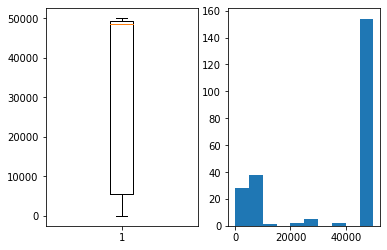

In [178]:
fig, (ax1,ax2)=plt.subplots(1,2)
ax1.boxplot(entrada_vazias_por_coluna)
ax2.hist(entrada_vazias_por_coluna)
media= entrada_vazias_por_coluna.median()
print(media)

In [179]:
numero_entradas = len(recursos)
treshold = 0.25
numero_entradas * treshold

12500.0

In [0]:
mater_variaveis = np.array(recursos.columns[(entrada_vazias_por_coluna <= (numero_entradas * treshold))])

In [181]:
mater_variaveis

array(['Var6', 'Var7', 'Var13', 'Var21', 'Var22', 'Var24', 'Var25',
       'Var28', 'Var35', 'Var38', 'Var44', 'Var57', 'Var65', 'Var73',
       'Var74', 'Var76', 'Var78', 'Var81', 'Var83', 'Var85', 'Var109',
       'Var112', 'Var113', 'Var119', 'Var123', 'Var125', 'Var132',
       'Var133', 'Var134', 'Var140', 'Var143', 'Var144', 'Var149',
       'Var153', 'Var160', 'Var163', 'Var173', 'Var181', 'Var192',
       'Var193', 'Var195', 'Var196', 'Var197', 'Var198', 'Var199',
       'Var202', 'Var203', 'Var204', 'Var205', 'Var206', 'Var207',
       'Var208', 'Var210', 'Var211', 'Var212', 'Var216', 'Var217',
       'Var218', 'Var219', 'Var220', 'Var221', 'Var222', 'Var223',
       'Var226', 'Var227', 'Var228'], dtype=object)

In [0]:
numericas_variaveis = [elem for elem in numericas_variaveis if elem in mater_variaveis]
categoricas_variaveis = [elem for elem in categoricas_variaveis if elem in mater_variaveis]

In [183]:
len(numericas_variaveis)

38

In [184]:
len(categoricas_variaveis)

28

In [0]:
for coluna in numericas_variaveis:
  coluna_media= recursos[coluna].mean()
  recursos[coluna]= recursos[coluna].fillna(coluna_media)

In [0]:
for coluna in categoricas_variaveis:
  recursos[coluna] = recursos[coluna].cat.add_categories('missing')
  recursos[coluna]= recursos[coluna].fillna('missing')

In [187]:
recursos.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12,Var13,Var14,Var15,Var16,Var17,Var18,Var19,Var20,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30,Var31,Var32,Var33,Var34,Var35,Var36,Var37,Var38,Var39,Var40,...,Var191,Var192,Var193,Var194,Var195,Var196,Var197,Var198,Var199,Var200,Var201,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var209,Var210,Var211,Var212,Var213,Var214,Var215,Var216,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,1526.000000,7.0,NaN,NaN,NaN,NaN,NaN,184.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,464.000000,580.0,NaN,14.000000,128.0,NaN,NaN,166.56,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,3570.0,NaN,NaN,...,NaN,bZkvyxLkBI,RO12,NaN,taul,1K8T,lK27,ka_ns41,nQUveAzAF7,NaN,NaN,dXGu,9_Y1,FbIm,VpdQ,haYg,me75fM6ugJ,kIsH,NaN,uKAI,L84s,XfqtO3UdzaXh_,NaN,NaN,NaN,XTbPUYD,sH5Z,cJvF,FzaX,1YVfGrO,oslk,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,525.000000,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.000000,210.0,NaN,2.000000,24.0,NaN,NaN,353.52,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,4764966.0,NaN,NaN,...,NaN,CEat0G8rTN,RO12,NaN,taul,1K8T,2Ix5,qEdASpP,y2LIM01bE1,NaN,NaN,lg1t,9_Y1,k13i,sJzTlal,zm5i,me75fM6ugJ,kIsH,NaN,uKAI,L84s,NhsEn4L,NaN,NaN,NaN,kZJyVg2,missing,missing,FzaX,0AJo2f2,oslk,2Kb5FSF,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,5236.000000,7.0,NaN,NaN,NaN,NaN,NaN,904.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1212.000000,1515.0,NaN,26.000000,816.0,NaN,NaN,220.08,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,5883894.0,NaN,NaN,...,NaN,eOQt0GoOh3,AERks4l,SEuy,taul,1K8T,ffXs,NldASpP,y4g9XoZ,vynJTq9,smXZ,4bTR,9_Y1,MGOA,VpdQ,haYg,DHn_WUyBhW_whjA88g9bvA64_,kIsH,NaN,uKAI,L84s,UbxQ8lZ,NaN,TTGHfSv,NaN,pMWAe2U,bHR7,UYBR,FzaX,JFM1BiF,Al6ZaUT,NKv4yOc,jySVZNlOJy,NaN,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,NaN
3,NaN,NaN,NaN,NaN,NaN,1326.437116,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,234.518225,0.0,NaN,4.507926,0.0,NaN,NaN,22.08,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,jg69tYsGvO,RO12,NaN,taul,1K8T,ssAy,_ybO0dd,4hMlgkf58mhwh,NaN,NaN,W8mQ,9_Y1,YULl,VpdQ,missing,me75fM6ugJ,kIsH,NaN,uKAI,Mtgm,NhsEn4L,NaN,NaN,NaN,kq0dQfu,eKej,UYBR,FzaX,L91KIiz,oslk,CE7uk3u,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1029.000000,7.0,NaN,NaN,NaN,NaN,NaN,3216.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.000000,80.0,NaN,4.000000,64.0,NaN,NaN,200.00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,IXSgUHShse,RO12,SEuy,taul,1K8T,uNkU,EKR938I,ThrHXVS,0v21jmy,smXZ,xklU,9_Y1,RVjC,sJzTlal,6JmL,me75fM6ugJ,kIsH,NaN,uKAI,L84s,XfqtO3UdzaXh_,NaN,SJs3duv,NaN,11p4mKe,H3p7,UYBR,FzaX,OrnLfvc,oslk,1J2cvxe,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,NaN


### variaveis categoricas com muitas categorias

In [0]:
n_categorias_por_entrada = recursos[categoricas_variaveis].apply(lambda x: len(set(x))) 

In [189]:
n_categorias_por_entrada

Var192      362
Var193       51
Var195       23
Var196        4
Var197      226
Var198     4291
Var199     5074
Var202     5714
Var203        6
Var204      100
Var205        4
Var206       22
Var207       14
Var208        3
Var210        6
Var211        2
Var212       81
Var216     2016
Var217    13991
Var218        3
Var219       23
Var220     4291
Var221        7
Var222     4291
Var223        5
Var226       23
Var227        7
Var228       30
dtype: int64

(array([21.,  1.,  0.,  4.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([2.00000e+00, 1.40090e+03, 2.79980e+03, 4.19870e+03, 5.59760e+03,
        6.99650e+03, 8.39540e+03, 9.79430e+03, 1.11932e+04, 1.25921e+04,
        1.39910e+04]),
 <a list of 10 Patch objects>)

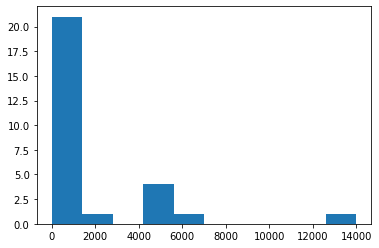

In [190]:
plt.hist(n_categorias_por_entrada)

In [0]:
categoricas_variaveis = np.array(n_categorias_por_entrada[n_categorias_por_entrada < 1400].index)

In [192]:
categoricas_variaveis

array(['Var192', 'Var193', 'Var195', 'Var196', 'Var197', 'Var203',
       'Var204', 'Var205', 'Var206', 'Var207', 'Var208', 'Var210',
       'Var211', 'Var212', 'Var218', 'Var219', 'Var221', 'Var223',
       'Var226', 'Var227', 'Var228'], dtype=object)

In [193]:
len(categoricas_variaveis)

21

In [0]:
recursos = recursos[list(numericas_variaveis) + list(categoricas_variaveis)]

In [195]:
recursos.shape

(50000, 59)

In [196]:
recursos.head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,Var44,Var57,Var65,Var73,Var74,Var76,Var78,Var81,Var83,Var85,Var109,Var112,Var113,Var119,Var123,Var125,Var132,Var133,Var134,Var140,Var143,Var144,Var149,Var153,Var160,Var163,Var173,Var181,Var192,Var193,Var195,Var196,Var197,Var203,Var204,Var205,Var206,Var207,Var208,Var210,Var211,Var212,Var218,Var219,Var221,Var223,Var226,Var227,Var228
0,1526.000000,7.0,184.0,464.000000,580.0,14.000000,128.0,166.56,0.0,3570.0,0.0,4.076907,9.0,36.0,35.0,1350864.0,0.0,7333.110000,5.0,12.0,104.00000,168.0,117625.60,1175.000000,6.0,720.0,0.0,1212385.0,69134.0,185.0,0.0,9.000000,397579.000000,1812252.0,142.0,38418.0,0.0,0.0,bZkvyxLkBI,RO12,taul,1K8T,lK27,9_Y1,FbIm,VpdQ,haYg,me75fM6ugJ,kIsH,uKAI,L84s,XfqtO3UdzaXh_,cJvF,FzaX,oslk,jySVZNlOJy,xb3V,RAYp,F2FyR07IdsN7I
1,525.000000,0.0,0.0,168.000000,210.0,2.000000,24.0,353.52,0.0,4764966.0,0.0,5.408032,9.0,26.0,0.0,2872928.0,3.0,151098.900000,25.0,2.0,40.00000,40.0,-356411.60,590.000000,72.0,0.0,8.0,4136430.0,357038.0,0.0,0.0,9.000000,278334.000000,10439160.0,32.0,238572.0,0.0,0.0,CEat0G8rTN,RO12,taul,1K8T,2Ix5,9_Y1,k13i,sJzTlal,zm5i,me75fM6ugJ,kIsH,uKAI,L84s,NhsEn4L,missing,FzaX,oslk,LM8l689qOp,fKCe,RAYp,F2FyR07IdsN7I
2,5236.000000,7.0,904.0,1212.000000,1515.0,26.000000,816.0,220.08,0.0,5883894.0,0.0,6.599658,9.0,130.0,518.0,1675776.0,0.0,16211.580000,40.0,58.0,312.00000,336.0,405104.00,3230.000000,114.0,5967.0,0.0,3478905.0,248932.0,800.0,0.0,36.000000,320565.000000,9826360.0,206.0,434946.0,0.0,0.0,eOQt0GoOh3,AERks4l,taul,1K8T,ffXs,9_Y1,MGOA,VpdQ,haYg,DHn_WUyBhW_whjA88g9bvA64_,kIsH,uKAI,L84s,UbxQ8lZ,UYBR,FzaX,Al6ZaUT,jySVZNlOJy,Qu4f,02N6s8f,ib5G6X1eUxUn6
3,1326.437116,0.0,0.0,234.518225,0.0,4.507926,0.0,22.08,0.0,0.0,0.0,1.988250,9.0,12.0,0.0,0.0,0.0,103084.052693,0.0,0.0,60.88866,0.0,-275703.60,916.112185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.727665,294920.804255,0.0,0.0,0.0,0.0,0.0,jg69tYsGvO,RO12,taul,1K8T,ssAy,9_Y1,YULl,VpdQ,missing,me75fM6ugJ,kIsH,uKAI,Mtgm,NhsEn4L,UYBR,FzaX,oslk,LM8l689qOp,FSa2,RAYp,F2FyR07IdsN7I
4,1029.000000,7.0,3216.0,64.000000,80.0,4.000000,64.0,200.00,0.0,0.0,0.0,4.552446,18.0,82.0,224.0,784448.0,0.0,37423.500000,0.0,0.0,32.00000,56.0,10714.84,215.000000,0.0,15111.0,0.0,150650.0,66046.0,3255.0,0.0,9.000000,267162.000000,644836.0,2.0,0.0,0.0,0.0,IXSgUHShse,RO12,taul,1K8T,uNkU,9_Y1,RVjC,sJzTlal,6JmL,me75fM6ugJ,kIsH,uKAI,L84s,XfqtO3UdzaXh_,UYBR,FzaX,oslk,LM8l689qOp,FSa2,RAYp,F2FyR07IdsN7I


### Selecao de variaveis baseado em arvore de decisões

Seleção de atributos: https://scikit-learn.org/stable/modules/feature_selection.html

1 - Palio
2 - Gol
3 - Uno

Palio - 1 0 0
Gol - 0 1 0
Uno - 0 1 1

In [0]:
recursos_c = pd.get_dummies(recursos)

In [198]:
recursos_c.shape

(50000, 1052)

In [199]:
recursos_c.head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,Var44,Var57,Var65,Var73,Var74,Var76,Var78,Var81,Var83,Var85,Var109,Var112,Var113,Var119,Var123,Var125,Var132,Var133,Var134,Var140,Var143,Var144,Var149,Var153,Var160,Var163,Var173,Var181,Var192_0G9vyxdMWg,Var192_0kQTmBU3gb,...,Var226_missing,Var227_02N6s8f,Var227_6fzt,Var227_RAYp,Var227_ZI9m,Var227_nIGXDli,Var227_nIGjgSB,Var227_vJ_w8kB,Var227_missing,Var228_0pzBWGkV3fbsGZN52DH,Var228_4rd_,Var228_55YFVY9,Var228_5oZS,Var228_6nxx00q6gnIF8ePJ3P3AEfZ1N,Var228_9VmiOykV3fbsAg65e4w,Var228_DU8B,Var228_F2FcTt7IdMT_v,Var228_F2FyR07IdsN7I,Var228_JnGLH58smNxIYcGK39k,Var228_NoEd,Var228_R4y5gQQWY8OodqDV,Var228_RjBDiL8f9CQYc21fICscNNpj6,Var228_SbOd7O8ky1wGNxp0Arj0Xs,Var228_TCU50_Yjmm6GIBZ0lL_,Var228_VjDE,Var228_WfJ2BB2SFSqauljlfOB,Var228_WfJYmPMksSqa1pajvfG,Var228_ZeaF,Var228_Zy3gnGM,Var228__URKn_77G3QyQHSVQ2N1RKmtW,Var228__cTCyH95OE93jSkoIBT,Var228_am14IcfM7tWLrUmRT52KtA,Var228_b9qbUNk0dML_Mvi2,Var228_d0LtHjWeaXyArdN4sxU_saXqH,Var228_ib5G6X1eUxUn6,Var228_iyHGyLCEkQ,Var228_n1OBWGkV3fbsHR75taC,Var228_r_7E,Var228_xwM2aC7IdeMC0,Var228_missing
0,1526.000000,7.0,184.0,464.000000,580.0,14.000000,128.0,166.56,0.0,3570.0,0.0,4.076907,9.0,36.0,35.0,1350864.0,0.0,7333.110000,5.0,12.0,104.00000,168.0,117625.60,1175.000000,6.0,720.0,0.0,1212385.0,69134.0,185.0,0.0,9.000000,397579.000000,1812252.0,142.0,38418.0,0.0,0.0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,525.000000,0.0,0.0,168.000000,210.0,2.000000,24.0,353.52,0.0,4764966.0,0.0,5.408032,9.0,26.0,0.0,2872928.0,3.0,151098.900000,25.0,2.0,40.00000,40.0,-356411.60,590.000000,72.0,0.0,8.0,4136430.0,357038.0,0.0,0.0,9.000000,278334.000000,10439160.0,32.0,238572.0,0.0,0.0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5236.000000,7.0,904.0,1212.000000,1515.0,26.000000,816.0,220.08,0.0,5883894.0,0.0,6.599658,9.0,130.0,518.0,1675776.0,0.0,16211.580000,40.0,58.0,312.00000,336.0,405104.00,3230.000000,114.0,5967.0,0.0,3478905.0,248932.0,800.0,0.0,36.000000,320565.000000,9826360.0,206.0,434946.0,0.0,0.0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1326.437116,0.0,0.0,234.518225,0.0,4.507926,0.0,22.08,0.0,0.0,0.0,1.988250,9.0,12.0,0.0,0.0,0.0,103084.052693,0.0,0.0,60.88866,0.0,-275703.60,916.112185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.727665,294920.804255,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1029.000000,7.0,3216.0,64.000000,80.0,4.000000,64.0,200.00,0.0,0.0,0.0,4.552446,18.0,82.0,224.0,784448.0,0.0,37423.500000,0.0,0.0,32.00000,56.0,10714.84,215.000000,0.0,15111.0,0.0,150650.0,66046.0,3255.0,0.0,9.000000,267162.000000,644836.0,2.0,0.0,0.0,0.0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Random Forest x Extra Tree: https://www.thekerneltrip.com/statistics/random-forest-vs-extra-tree/

In [0]:
def etc_importancia(recursos, resultado):
  modelo = ExtraTreesClassifier(n_estimators=200, criterion='entropy', verbose=0)
  modelo.fit(recursos,  np.array(resultado).ravel())
  
  importancia = modelo.feature_importances_
  variaveis = np.array(recursos.columns)
  indice = np.argsort(importancia)[::-1]
  importancia = importancia[indice]
  variaveis = variaveis[indice]

  return variaveis, importancia

In [0]:
variaveis, importancia = etc_importancia(recursos_c, resultado)

In [202]:
importancia 

array([0.01801667, 0.01752932, 0.01725852, ..., 0.        , 0.        ,
       0.        ])

In [203]:
variaveis

array(['Var57', 'Var73', 'Var113', ..., 'Var212_ZFq7s6OYdbq4pDsQ',
       'Var192_6VLgUHQicn', 'Var228_missing'], dtype=object)

In [204]:

variaveis[0]

'Var57'

In [205]:
importancia[0]

0.01801666726104832

In [0]:
def soma_e_plot_importancia(variaveis, importancia):
  soma_importancias = pd.DataFrame()
  for i in range(importancia.size):
    soma_importancia = importancia[:(i+1)].sum()
    eh_variavel= pd.Series([variaveis[i],soma_importancia])
    soma_importancias = soma_importancias.append(eh_variavel, ignore_index=True)

  plt.scatter(soma_importancias.index, soma_importancias.iloc[:,1])
  return soma_importancias

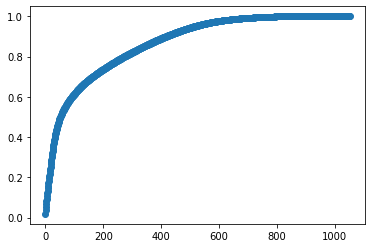

In [207]:
soma_importancias = soma_e_plot_importancia(variaveis, importancia)

In [0]:
def matenha_variaveis(recursos, soma_importancias,treshold):
  manter_variaveis = list(soma_importancias[soma_importancias.iloc[:,1] <= treshold].iloc[:,0])
  recursos = recursos.loc[:,manter_variaveis]

  return recursos

  

In [0]:
recursos_c = matenha_variaveis(recursos_c, soma_importancias, treshold=0.99)

In [210]:
recursos_c.shape

(50000, 685)

In [211]:
recursos_c.head()

,Var57,Var73,Var113,Var153,Var81,Var133,Var38,Var76,Var134,Var28,Var6,Var123,Var119,Var160,Var25,Var149,Var22,Var112,Var21,Var163,Var83,Var85,Var109,Var125,Var24,Var13,Var144,Var140,Var7,Var65,Var74,Var205_VpdQ,Var218_missing,Var205_sJzTlal,Var223_LM8l689qOp,Var205_09_Q,Var132,Var206_IYzP,Var218_cJvF,Var219_FzaX,...,Var197_plfw,Var192_LDPvyxdtN_,Var192_JMGq9at_88,Var192_H7er4Rdc_a,Var212_MeOIHRG3F9,Var197_z8at,Var192_AKDr4RXktW,Var197_pw40,Var197_Rn7z,Var207_5iay,Var212_fnfcPDe,Var197_W5sH,Var197_nCqp,Var207_0MCPoln,Var212_QsQAxv5,Var219_FqMWi1g,Var192_l0JOj17ejg,Var192_xOXTmBkF1Q,Var192_dPsBcmRZ57,Var195_ev6I,Var228_VjDE,Var193_NRCqczK,Var192_NFqq9at_88,Var197_gEzH,Var195_TnJpfvsJgF,Var192_86ct0Gdncc,Var193_LrdVolaSGUfkVeWC,Var212_4ylQpLr46xum2hHQ,Var197_ZF5Q,Var212_6z7lZp6XhQkon,Var207_6C53VA1kCv,Var192_hOVrjIQ6UK,Var197_EbEb,Var192_X9zgUHShse,Var219_tdJW_Pm,Var228_DU8B,Var197_5B99,Var197_2D6V,Var192_9u0r4Rdncc,Var192_bZkPe2fHUn
0,4.076907,36.0,117625.60,1812252.0,7333.110000,1212385.0,3570.0,1350864.0,69134.0,166.56,1526.000000,6.0,1175.000000,142.0,128.0,397579.000000,580.0,168.0,464.000000,38418.0,5.0,12.0,104.00000,720.0,14.000000,184.0,9.000000,185.0,7.0,9.0,35.0,1,0,0,0,0,0.0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.408032,26.0,-356411.60,10439160.0,151098.900000,4136430.0,4764966.0,2872928.0,357038.0,353.52,525.000000,72.0,590.000000,32.0,24.0,278334.000000,210.0,40.0,168.000000,238572.0,25.0,2.0,40.00000,0.0,2.000000,0.0,9.000000,0.0,0.0,9.0,0.0,0,1,1,1,0,8.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6.599658,130.0,405104.00,9826360.0,16211.580000,3478905.0,5883894.0,1675776.0,248932.0,220.08,5236.000000,114.0,3230.000000,206.0,816.0,320565.000000,1515.0,336.0,1212.000000,434946.0,40.0,58.0,312.00000,5967.0,26.000000,904.0,36.000000,800.0,7.0,9.0,518.0,1,0,0,0,0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.988250,12.0,-275703.60,0.0,103084.052693,0.0,0.0,0.0,0.0,22.08,1326.437116,0.0,916.112185,0.0,0.0,294920.804255,0.0,0.0,234.518225,0.0,0.0,0.0,60.88866,0.0,4.507926,0.0,11.727665,0.0,0.0,9.0,0.0,1,0,0,1,0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.552446,82.0,10714.84,644836.0,37423.500000,150650.0,0.0,784448.0,66046.0,200.00,1029.000000,0.0,215.000000,2.0,64.0,267162.000000,80.0,56.0,64.000000,0.0,0.0,0.0,32.00000,15111.0,4.000000,3216.0,9.000000,3255.0,7.0,18.0,224.0,0,0,1,1,0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Dividindo os dados dataset para treino e dataset para teste

In [0]:
def split_dataseet(recursos,resultado,test_size=0.2):
  x_train, x_test, y_train, y_test = train_test_split(recursos,resultado,test_size =test_size,
                                                      stratify = resultado, random_state = 0)
  y_train, y_test = np.array(y_train).ravel(), np.array(y_test).ravel()

  return  x_train, x_test, y_train, y_test 

In [0]:
x_train, x_test, y_train, y_test = split_dataseet(recursos_c , resultado)

In [214]:
x_train.shape

(40000, 685)

In [215]:
x_test.shape

(10000, 685)

### Modelagem preliminar

AUC e ROC: https://medium.com/bio-data-blog/entenda-o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-8191fb4df772

#### Random Forest Classifier

In [0]:
def rfc_test(x_train, y_train, n_estimators = 100, cv = 5):
  np.random.seed(0)
  rfc = RandomForestClassifier(n_estimators = n_estimators, random_state = 0, n_jobs = -1)
  cv_scores = cross_val_score(rfc, x_train, y_train, scoring = 'roc_auc', cv = cv, n_jobs = -1)
  print('Média dos cinco testes: ', cv_scores.mean())

In [217]:
rfc_test(x_train, y_train)

Média dos cinco testes:  0.632429432316248


#### Gradient Boosting Classifer

Métodos com árvores de decisão: https://iaexpert.com.br/index.php/2019/04/18/xgboost-a-evolucao-das-arvores-de-decisao/

Gradient Boosting: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [0]:
def gbc_test(x_train, y_train, n_estimators = 100, learning_rate = 0.1, cv = 5):
  np.random.seed(0)
  gbc = GradientBoostingClassifier(n_estimators = n_estimators, learning_rate = learning_rate,
                                  random_state = 0)
  cv_scores = cross_val_score(gbc, x_train, y_train, scoring = 'roc_auc', cv = cv, n_jobs = -1)
  print('Média dos cinco testes: ', cv_scores.mean())

In [219]:
gbc_test(x_train, y_train)

Média dos cinco testes:  0.670251395436453


## Otimizando o modelo GBC

### Otimizando n_estimetos para lerning_rate

In [0]:
def otimizando(n_estimators, learning_rate, min_samples_split, min_samples_leaf,
             max_depth, max_features, subsample, params, cv = 5):
  np.random.seed(0)
  gbc = GradientBoostingClassifier(n_estimators = n_estimators,
                                  learning_rate = learning_rate,
                                  min_samples_split = min_samples_split,
                                  min_samples_leaf = min_samples_leaf,
                                  max_depth = max_depth,
                                  max_features = max_features,
                                  subsample = subsample,
                                  random_state = 0)
  grid_search = GridSearchCV(estimator = gbc, param_grid = params, scoring = 'roc_auc',
                             n_jobs = -1,  cv = cv)
  # iid = False,
  grid_search.fit(x_train, y_train)
  results = grid_search.cv_results_
  best_params = grid_search.best_params_
  best_score = grid_search.best_score_
  print(best_params, best_score)
  
  return gbc, best_params, best_score

In [0]:
# variaveis para coletar resultado

modelos = np.array([])
opt_parametros = dict()
scores = np.array([])

In [0]:
# Modelo 0
n_estimators = None
learning_rate = 0.1
max_depth = 8
min_samples_split = 250
min_samples_leaf = 20 
max_features = 'sqrt'
subsample = 0.8
params = {'n_estimators': range(50,151,10)}

In [223]:
gbc, opt_param, score = otimizando(n_estimators = n_estimators,
                                 learning_rate = learning_rate,
                                 min_samples_split = min_samples_split,
                                 min_samples_leaf = min_samples_leaf,
                                 max_depth = max_depth,
                                 max_features = max_features,
                                 subsample = subsample,
                                 params = params)

{'n_estimators': 50} 0.6666479409752382


In [0]:
# atualizando as variaveis com os resultados
modelos = np.append(modelos, gbc)
opt_parametros={**opt_parametros,**opt_param}
scores = np.append(scores,score)

In [225]:
modelos

array([GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=20, min_samples_split=250,
                           min_weight_fraction_leaf=0.0, n_estimators=None,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)], dtype=object)

In [226]:
opt_parametros

{'n_estimators': 50}

In [227]:
scores

array([0.66664794])

### Otimizando max_depth e mim_samples_spli

In [0]:
# modelo 1
n_estimators = opt_parametros['n_estimators']
max_depth = None
min_samples_split = None
min_samples_leaf = 20
max_features = 'sqrt'
subsample = 0.8
params = {'max_depth': range(3, 12, 2), 'min_samples_split': range(150, 401, 50)}


In [229]:
gbc, opt_param, score = otimizando(n_estimators = n_estimators,
                                 learning_rate = learning_rate,
                                 min_samples_split = min_samples_split,
                                 min_samples_leaf = min_samples_leaf,
                                 max_depth = max_depth,
                                 max_features = max_features,
                                 subsample = subsample,
                                 params = params)

{'max_depth': 7, 'min_samples_split': 200} 0.6711763294061918


In [0]:
# atualizando as variaveis com os resultados
modelos = np.append(modelos, gbc)
opt_parametros={**opt_parametros,**opt_param}
scores = np.append(scores,score)

In [231]:
modelos

array([GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=20, min_samples_split=250,
                           min_weight_fraction_leaf=0.0, n_estimators=None,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False),
       GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=None,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_

In [232]:
opt_parametros

{'max_depth': 7, 'min_samples_split': 200, 'n_estimators': 50}

In [233]:
scores

array([0.66664794, 0.67117633])

### Otimizando mim_samples_leaf




In [0]:
# modelo 2
n_estimators = opt_parametros['n_estimators']
max_depth = opt_parametros['max_depth']
min_samples_split = opt_parametros['min_samples_split']
min_samples_leaf = None
max_features = 'sqrt'
subsample = 0.8
params = {'min_samples_leaf': range(25, 61, 15)}

In [235]:
gbc, opt_param, score = otimizando(n_estimators = n_estimators,
                                 learning_rate = learning_rate,
                                 min_samples_split = min_samples_split,
                                 min_samples_leaf = min_samples_leaf,
                                 max_depth = max_depth,
                                 max_features = max_features,
                                 subsample = subsample,
                                 params = params)

{'min_samples_leaf': 55} 0.6695168733425392


In [0]:
# atualizando as variaveis com os resultados
modelos = np.append(modelos, gbc)
opt_parametros={**opt_parametros,**opt_param}
scores = np.append(scores,score)

In [237]:
opt_parametros

{'max_depth': 7,
 'min_samples_leaf': 55,
 'min_samples_split': 200,
 'n_estimators': 50}

In [238]:
scores

array([0.66664794, 0.67117633, 0.66951687])

### Otimizando max_features

In [0]:
# modelo 3
n_estimators = opt_parametros['n_estimators']
max_depth = opt_parametros['max_depth']
min_samples_split = opt_parametros['min_samples_split']
min_samples_leaf = opt_parametros['min_samples_leaf']
max_features = None
subsample = 0.8
params = {'max_features': range(21, 31, 1)}

In [240]:
gbc, opt_param, score = otimizando(n_estimators = n_estimators,
                                 learning_rate = learning_rate,
                                 min_samples_split = min_samples_split,
                                 min_samples_leaf = min_samples_leaf,
                                 max_depth = max_depth,
                                 max_features = max_features,
                                 subsample = subsample,
                                 params = params)

{'max_features': 28} 0.6716988471726983


In [0]:
# atualizando as variaveis com os resultados
modelos = np.append(modelos, gbc)
opt_parametros={**opt_parametros,**opt_param}
scores = np.append(scores,score)

In [242]:
opt_parametros

{'max_depth': 7,
 'max_features': 28,
 'min_samples_leaf': 55,
 'min_samples_split': 200,
 'n_estimators': 50}

### Otimizando subsample

In [0]:
# modelo 4
n_estimators = opt_parametros['n_estimators']
max_depth = opt_parametros['max_depth']
min_samples_split = opt_parametros['min_samples_split']
min_samples_leaf = opt_parametros['min_samples_leaf']
max_features = opt_parametros['max_features']
subsample = None
params = {'subsample': np.append(np.arange(0.6,1 ,0.05),1)}

In [244]:
np.append(np.arange(0.6,1 ,0.05),1)

array([0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [245]:
gbc, opt_param, score = otimizando(n_estimators = n_estimators,
                                 learning_rate = learning_rate,
                                 min_samples_split = min_samples_split,
                                 min_samples_leaf = min_samples_leaf,
                                 max_depth = max_depth,
                                 max_features = max_features,
                                 subsample = subsample,
                                 params = params)

{'subsample': 0.9500000000000003} 0.6732009688002177


In [0]:
# atualizando as variaveis com os resultados
modelos = np.append(modelos, gbc)
opt_parametros={**opt_parametros,**opt_param}
scores = np.append(scores,score)

In [247]:
scores

array([0.66664794, 0.67117633, 0.66951687, 0.67169885, 0.67320097])

In [248]:
opt_parametros

{'max_depth': 7,
 'max_features': 28,
 'min_samples_leaf': 55,
 'min_samples_split': 200,
 'n_estimators': 50,
 'subsample': 0.9500000000000003}

### Otimizando N_ESTIMARTORS E LEARNING_RATE

In [0]:
def otimizando2(n_estimators, learning_rate, min_samples_split, min_samples_leaf,
             max_depth, max_features, subsample, cv = 5):
  np.random.seed(0)
  gbc = GradientBoostingClassifier(n_estimators = n_estimators,
                                  learning_rate = learning_rate,
                                  min_samples_split = min_samples_split,
                                  min_samples_leaf = min_samples_leaf,
                                  max_depth = max_depth,
                                  max_features = max_features,
                                  subsample = subsample,
                                  random_state = 0)
  cv_scores = cross_val_score(gbc, x_train, y_train, scoring = 'roc_auc', cv = cv, n_jobs = -1)
  print(cv_scores)
  score = cv_scores.mean()
  print(score)
  plt.plot(np.append(scores, score))
  plt.title('n_estimators = {} / learning rate = {}'.format(n_estimators, learning_rate))
  
  return gbc, score

In [0]:
learning_rate =0.1
n_estimators = opt_parametros['n_estimators']

In [0]:
#modelo 5
subsample = opt_parametros['subsample']
n_estimators = opt_parametros['n_estimators']
max_depth = opt_parametros['max_depth']
min_samples_split = opt_parametros['min_samples_split']
min_samples_leaf = opt_parametros['min_samples_leaf']
max_features = opt_parametros['max_features']
learning_rate /=2
n_estimators *=2

In [252]:
learning_rate, n_estimators

(0.05, 100)

[0.66703436 0.68880295 0.6783967  0.68034657 0.66033925]
0.6749839655879828


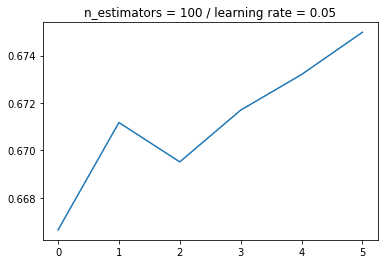

In [253]:
gbc, score = otimizando2(n_estimators = n_estimators,
                                 learning_rate = learning_rate,
                                 min_samples_split = min_samples_split,
                                 min_samples_leaf = min_samples_leaf,
                                 max_depth = max_depth,
                                 max_features = max_features,
                                 subsample = subsample,
                                 )

In [254]:
score

0.6749839655879828

In [0]:
# atualizando as variaveis com os resultados
modelos = np.append(modelos, gbc)
scores = np.append(scores,score)

In [256]:
opt_parametros

{'max_depth': 7,
 'max_features': 28,
 'min_samples_leaf': 55,
 'min_samples_split': 200,
 'n_estimators': 50,
 'subsample': 0.9500000000000003}

In [257]:
# modelo 6
learning_rate/=5
n_estimators*=5
learning_rate, n_estimators


(0.01, 500)

[0.66639457 0.69081918 0.67793402 0.68137783 0.66201641]
0.6757084018867496


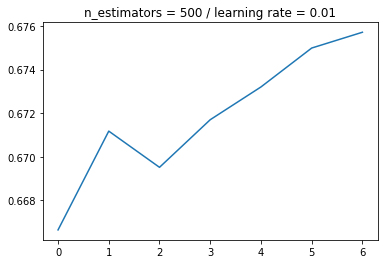

In [258]:
gbc, score = otimizando2(n_estimators = n_estimators,
                                 learning_rate = learning_rate,
                                 min_samples_split = min_samples_split,
                                 min_samples_leaf = min_samples_leaf,
                                 max_depth = max_depth,
                                 max_features = max_features,
                                 subsample = subsample,
                                 )

In [0]:
modelos = np.append(modelos, gbc)
scores = np.append(scores, score)

In [262]:
scores

array([0.66664794, 0.67117633, 0.66951687, 0.67169885, 0.67320097,
       0.67498397, 0.6757084 ])

In [259]:
# modelo 7

learning_rate/=2
n_estimators*=2
learning_rate, n_estimators

(0.005, 1000)

[0.66696864 0.69174646 0.67746319 0.68266366 0.66353376]
0.6764751419167487


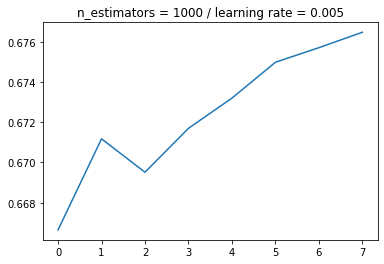

In [263]:
gbc, score = otimizando2(n_estimators = n_estimators,
                                 learning_rate = learning_rate,
                                 min_samples_split = min_samples_split,
                                 min_samples_leaf = min_samples_leaf,
                                 max_depth = max_depth,
                                 max_features = max_features,
                                 subsample = subsample,
                                 )

In [0]:
modelos = np.append(modelos, gbc)
scores = np.append(scores, score)

In [265]:
scores

array([0.66664794, 0.67117633, 0.66951687, 0.67169885, 0.67320097,
       0.67498397, 0.6757084 , 0.67647514])

In [266]:
# modelo 8

learning_rate/=5
n_estimators*=5
learning_rate, n_estimators

(0.001, 5000)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


[0.66620268 0.69101659 0.67825181 0.68259758 0.66421569]
0.676456868137598


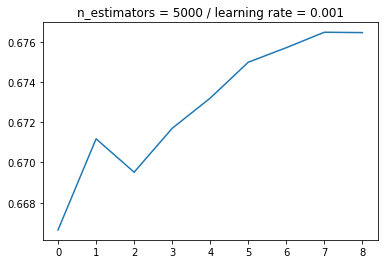

In [267]:
gbc, score = otimizando2(n_estimators = n_estimators,
                                 learning_rate = learning_rate,
                                 min_samples_split = min_samples_split,
                                 min_samples_leaf = min_samples_leaf,
                                 max_depth = max_depth,
                                 max_features = max_features,
                                 subsample = subsample,
                                 )

In [0]:
modelos = np.append(modelos, gbc)
scores = np.append(scores, score)

In [269]:
scores

array([0.66664794, 0.67117633, 0.66951687, 0.67169885, 0.67320097,
       0.67498397, 0.6757084 , 0.67647514, 0.67645687])

In [270]:
print('Modelo de melhor desempenho: ', scores.argmax(), ' - AUC: ', max(scores))

Modelo de melhor desempenho:  7  - AUC:  0.6764751419167487


In [0]:
melhor_modelo = modelos[scores.argmax()]

In [273]:
melhor_modelo.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.005, loss='deviance', max_depth=7,
                           max_features=28, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=55, min_samples_split=200,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=0.9500000000000003,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
y_probabilidade_de_pertencer_kd_classe = melhor_modelo.predict_proba(x_test)

In [275]:
y_probabilidade_de_pertencer_kd_classe

array([[0.83961776, 0.16038224],
       [0.964285  , 0.035715  ],
       [0.94580413, 0.05419587],
       ...,
       [0.93623399, 0.06376601],
       [0.93635568, 0.06364432],
       [0.86887446, 0.13112554]])

In [277]:
y_probabilidade_de_pertencer_kd_classe[:,1]

array([0.16038224, 0.035715  , 0.05419587, ..., 0.06376601, 0.06364432,
       0.13112554])

In [278]:
roc_auc_score(y_test, y_probabilidade_de_pertencer_kd_classe[:,1])

0.6856076623629442

In [279]:
roc_auc_score(y_test, y_probabilidade_de_pertencer_kd_classe[:,-1])

0.6856076623629442

## Resultados KDD Cup 2009

https://www.kdd.org/kdd-cup/view/kdd-cup-2009/Results

## Conclusões

> Nesse exercício, foi possível modelar a possibilidade do cancelamento da conta com uma área sob a curva (AUC) de 0.6868

> É bom lembrar que AUC = 0.5 indica a linha de base, no caso de um modelo que faz predições aleatórias, e AUC = 1.0 indica um modelo ideal, que faz predições perfeitas

> Pode parecer que o AUC alcançado não é muito alto, mas também temos que considerar que o score mais alto no desafio público foi de 0.76

> Isso indica que, muito possivelmente, os dados fornecidos não são suficientes para fazer a modelagem perfeita do cancelamento da conta, e isso é sempre algo que devemos levar em consideração quando estamos tentando desenvolver modelos para problemas que não temos qualquer conhecimento prévio

> Fazendo uma analogia simples, seria como tentar predizer o peso de uma pessoa usando uma base de dados com apenas peso e altura de uma população: nós até conseguiríamos uma resposta razoável, já que as duas variáveis são correlacionadas, mas ela não seria perfeita simplesmente porque mais variáveis têm impacto no peso além da altura. É possível, portanto, que o maior score indique o melhor modelo que esses dados são capazes de fornecer

> Também devemos nos lembrar de que esses desafios geralmente são lançados sem que exista uma resposta prévia, eles servem justamente para que a própria comunidade tente encontrar soluções e comparar seus resultados entre si, e não com um "padrão ouro" ou a "resposta certa"

> Esses desafios são uma ótima oportunidade para se familiarizar com o ambiente real da carreira de um cientista de dados, e para conhecer e implementar na prática métodos e abordagens novas.

## Melhorias

> Testar outros modelos sempre é uma opção que se deve considerar. Nesse exercício, nós paramos nos classificadores do tipo gradient boosting, mas também poderíamos ter considerado modelos baseados em árvores de decisão mais novos, como o XGBoost, e até em redes neurais

> Os dados estão mascarados, o que dificulta qualquer feature engineering, já que para isso geralmente nós tentamos transformar as variáveis em função do conhecimento prévio que temos sobre elas. Por exemplo, se tivéssemos datas, poderíamos criar uma nova variável refletindo as estações do ano, se julgássemos relevante, mas nesse exercício ficamos restritos a tratar os dados com métricas estritamente numéricas, como o número de categorias que uma variável categórica possui, por não sabermos a que a variável se refere

> Mesmo com essas restrições, a seleção das melhores variáveis pode ser feita apenas considerando a natureza dos dados, e não da própria variável, e é possível testar outros métodos de seleção além daquele que nós usamos (seleção baseada em árvore de decisão)

> Também é possível melhorar o processo de fine-tuning da seguinte maneira: primeiro nós treinamos um hiperparâmetro num intervalo maior, por exemplo, [1, 2, 3, 4, 5], e depois que nós descobrimos o melhor parâmetro nessa faixa, por exemplo [2], podemos treinar de novo nas imediações desse valor, por exemplo [1.5, 2, 2.5], e assim por diante

> Ao final do treinamento apresentado no exercício (MODELO 8), nós observamos que a métrica continuava em tendência de aumentar, então talvez seja interessante continuar testando outros valores para learning rate/número de épocas

> Também é útil fazer um grid search com todos os parâmetros ao mesmo tempo, já que não necessariamente cada parâmetro se comporta da forma independente que nós consideramos, mas para isso é bom usar poucos valores para cada parâmetro (por isso é bom fazer uma seleção prévia da forma que nós fizemos), ou teríamos um número de modelos excessivamente grande pra testar, o que demanda maior capacidade de processamento